## Table Of Content

1. [Introduction](#1.-Introduction)
    
    1.1 [Nama Anggota Kelompok](#1.1-Nama-Anggota-Kelompok)
    
    1.2 [Penjelasan Dataset](#1.2-Penjelasan-Dataset)
    
    1.3 [Penjelasan Projek](#1.3-Penjelasan-Projek)


2. [Tahapan Pengerjaan](#2.-Tahapan-Pengerjaan)

    2.1 [Import Library](#2.1-Import-Library)
    
    2.2 [Data Collecting](#2.2-Data-Collecting)
    
    2.3 [Data Preprocessing](#2.3-Data-Preprocessing)
    
    2.4 [Data Modelling](#2.4-Data-Modelling)
    
    2.5 [Evaluasi](#2.5-Evaluasi)
    
    2.6 [Visualisasi Pertumbuhan Akurasi](#2.6-Visualisasi-Pertumbuhan-Akurasi)
    
    2.7 [Model Prediksi](#2.7-Model-Prediksi)
    
    2.8 [Saving Model](#2.8-Saving-Model)

# 1. Introduction

## 1.1 Nama Anggota Kelompok :

## KELOMPOK 1_C1_2020
 1. Arya Nanda_2009106114
 2. Lidya Simanungkalit_2009106125
 3. Rena Indah Choirunnisa_2009106126

## 1.2 Penjelasan Dataset
Dataset yang digunakan berisi image/foto wajah dengan class laki-laki dan class perempuan yang totalnya berjumlah 58.148 image/foto. Besar dari dataset yang digunakan yaitu 486 MB.

## 1.3 Penjelasan Projek
Projek ini bertujuan untuk klasifikasi gender yaitu laki-laki atau perempuan menggunakan variabel input data image menggunakan algoritma Convolutional Neural Network (CNN).

# 2. Tahapan Pengerjaan

## 2.1 Import Library

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout , GlobalAveragePooling2D

## 2.2 Data Collecting

In [2]:
train = "Dataset/Train"
test = "Dataset/Test"
valid = "Dataset/Validation"

## 2.3 Data Preprocessing

In [3]:
train_gen = ImageDataGenerator(
    rescale=1./255.0)
test_gen = ImageDataGenerator(
    rescale=1./255.0)
valid_gen = ImageDataGenerator(
    rescale=1./255.0)


In [4]:
train_ds = train_gen.flow_from_directory(
    train,target_size=(224,224),batch_size=128, class_mode='binary')
test_ds = test_gen.flow_from_directory(
    test,target_size=(224,224),batch_size=128, class_mode='binary')
valid_ds = valid_gen.flow_from_directory(
    valid,target_size=(224,224),batch_size=128, class_mode='binary')

Found 31480 images belonging to 2 classes.
Found 10190 images belonging to 2 classes.
Found 16478 images belonging to 2 classes.


In [5]:
def plot_data(ds,batch_num,image_num):
    plt.imshow(ds[batch_num][0][image_num])
    name = np.argmax(ds[batch_num][1][image_num])
    plt.xlabel(list(train_ds.class_indices)[name])


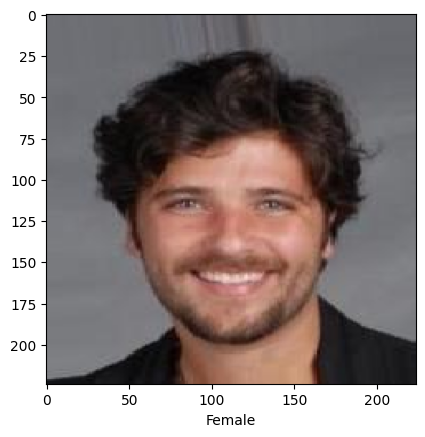

In [6]:
plot_data(train_ds,1,1)

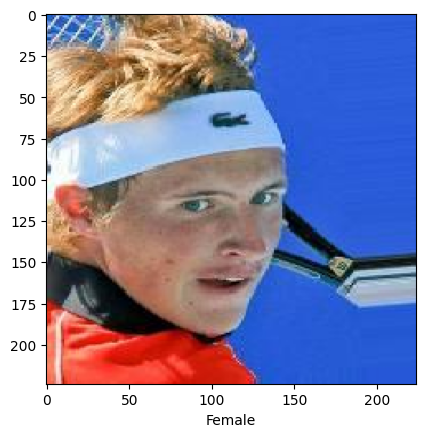

In [7]:
plot_data(test_ds,2,2)

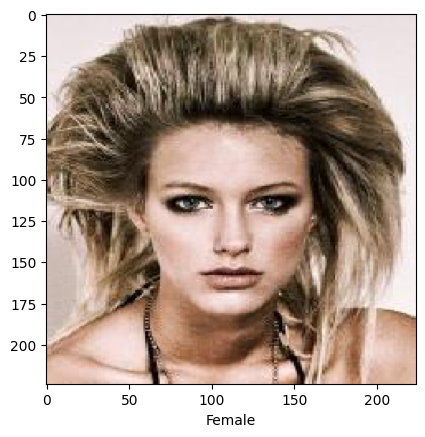

In [8]:
plot_data(valid_ds,2,30)

## 2.4 Data Modelling

In [9]:
model = Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=[224,224,3]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 197136)            0         
                                                                 
 dense (Dense)               (None, 128)               25233536  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 25,234,113
Trainable params: 25,234,113
Non-trainable params: 0
____________________________________________

In [10]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])                                                                                                                           

In [11]:
history = model.fit(train_ds,epochs=20,validation_data=valid_ds, steps_per_epoch=15)

Epoch 1/20
15/15 [==============================] - 201s 14s/step - loss: 5.1961 - accuracy: 0.4964 - val_loss: 0.8388 - val_accuracy: 0.6007
Epoch 2/20
15/15 [==============================] - 127s 9s/step - loss: 0.7752 - accuracy: 0.5615 - val_loss: 0.7521 - val_accuracy: 0.5447
Epoch 3/20
15/15 [==============================] - 120s 8s/step - loss: 0.6037 - accuracy: 0.6786 - val_loss: 0.5257 - val_accuracy: 0.7579
Epoch 4/20
15/15 [==============================] - 131s 9s/step - loss: 0.5136 - accuracy: 0.7583 - val_loss: 0.4803 - val_accuracy: 0.7840
Epoch 5/20
15/15 [==============================] - 125s 9s/step - loss: 0.4497 - accuracy: 0.7922 - val_loss: 0.4258 - val_accuracy: 0.8221
Epoch 6/20
15/15 [==============================] - 132s 9s/step - loss: 0.3827 - accuracy: 0.8474 - val_loss: 0.3637 - val_accuracy: 0.8487
Epoch 7/20
15/15 [==============================] - 118s 8s/step - loss: 0.3625 - accuracy: 0.8547 - val_loss: 0.3794 - val_accuracy: 0.8423
Epoch 8/20
1

## 2.5 Evaluasi

In [12]:
model_evaluate = model.evaluate(test_ds)
print(model_evaluate[0])
print(model_evaluate[1])

80/80 [==============================] - 89s 1s/step - loss: 0.1751 - accuracy: 0.9369
0.17506253719329834
0.936898946762085


## 2.6 Visualisasi Pertumbuhan Akurasi

In [13]:
#train
y_acc_train = history.history['accuracy']
y_acc_val = history.history['val_accuracy']

#validation
y_loss_train = history.history['loss']
y_loss_val = history.history['val_loss']

#epoch
x_ = range(len(y_acc_train))

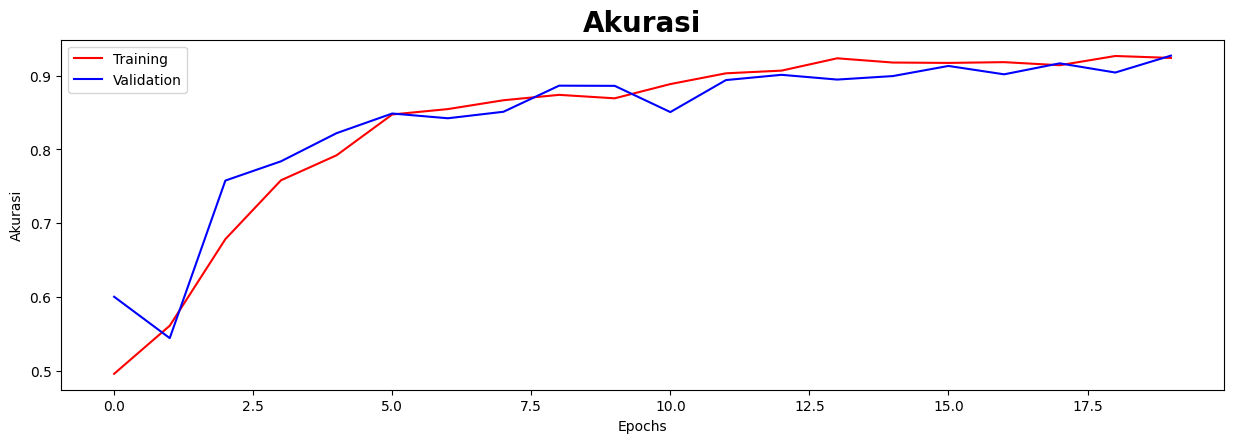

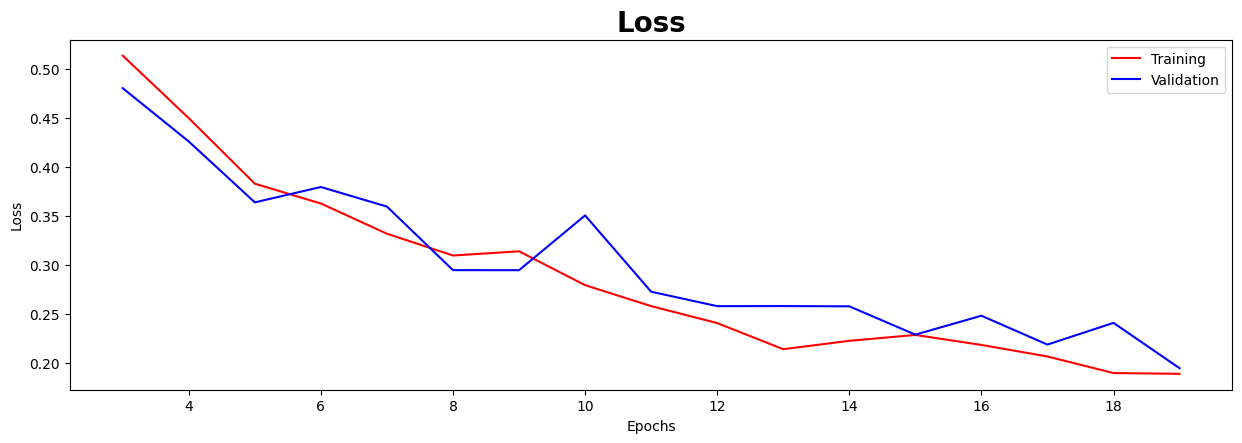

In [14]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(x_, y_acc_train, c='r', label='Training')
plt.plot(x_, y_acc_val, c='b', label='Validation')
plt.title('Akurasi',fontsize=20,fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()

plt.figure(figsize=(15,10))
plt.subplot(2,1,2)
plt.plot(x_[3:], y_loss_train[3:], c='r', label='Training')
plt.plot(x_[3:], y_loss_val[3:], c='b', label='Validation')
plt.title('Loss',fontsize=20,fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 2.7 Model Prediksi

In [15]:
model.predict(test_ds)

80/80 [==============================] - 54s 664ms/step


array([[0.8688087 ],
       [0.07450327],
       [0.8040284 ],
       ...,
       [0.04039381],
       [0.9702911 ],
       [0.98040515]], dtype=float32)

In [16]:
class_names = ['female','male']

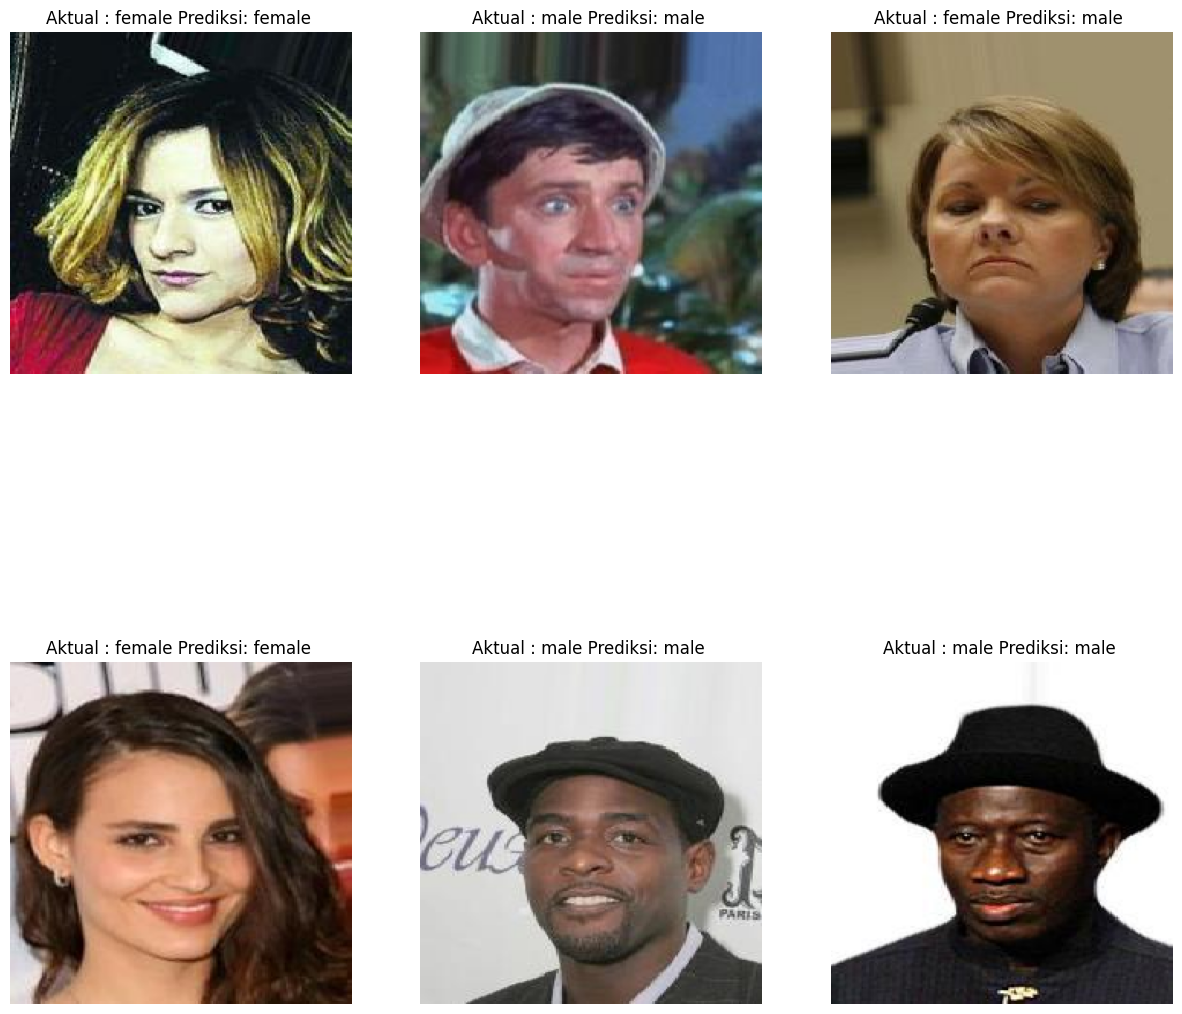

In [17]:
img, labels = test_ds.next()
plt.figure(figsize=(15,15))
for i in range(6):
    predictions = model.predict(tf.expand_dims(img[i], 0),verbose=0)

    plt.subplot(2,3,i+1)

    hasil = 0
    if (predictions > 0.5):
      hasil = 1

    temp = tf.cast(labels[i], dtype=tf.int32) #mengubah float jadi int. indeks tdk bisa float

    plt.title(f'Aktual : {class_names[temp]} Prediksi: {class_names[hasil]} ')
    plt.grid('off')
    plt.axis('off')
    plt.imshow(img[i]);

In [18]:
def predict_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=[224,224])
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.cast(img_array, dtype=tf.float32) / tf.constant(256, dtype=tf.float32)
    img_array = tf.expand_dims(img_array, 0)


    hasil = 0
    predictions = model.predict(img_array)
    if (predictions > 0.5):
        hasil = 1
    elif (predictions < 0.5):
        hasil = 0
    print(f'label : {class_names[hasil]}')
    plt.grid('off')
    plt.axis('off')
    plt.imshow(img);

1/1 [==============================] - 0s 46ms/step
label : female


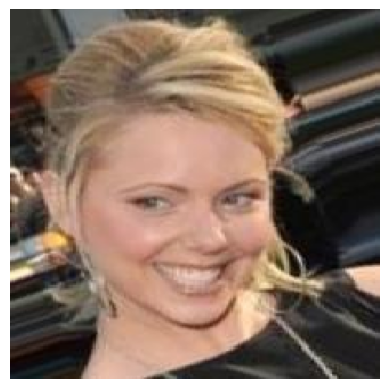

In [19]:
predict_image('Dataset/test/female/170000.jpg')

1/1 [==============================] - 0s 53ms/step
label : male


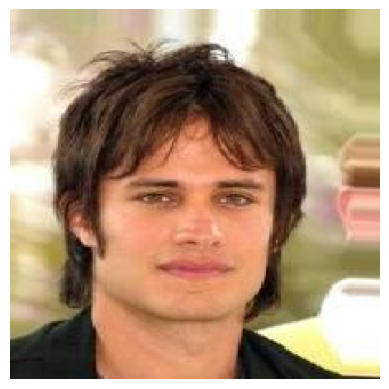

In [20]:
predict_image('Dataset/test/male/169505.jpg')

## 2.8 Saving Model

In [22]:
model.save("model_1_C1_2020.h5")